In [17]:
import pandas as pd
import numpy as np
from pandas.api.types import CategoricalDtype
from copy import deepcopy

In [18]:
original_data = pd.read_csv("data.csv", parse_dates = ['Date'])
df = deepcopy(original_data)
df = df[df["Region"] == "global"] 
df

,Position,Track Name,Artist,Streams,URL,Date,Region
3116643,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,global
3116644,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,global
3116645,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,global
3116646,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,global
3116647,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,global
...,...,...,...,...,...,...,...
3190438,196,Delicate,Taylor Swift,507893,https://open.spotify.com/track/6NFyWDv5Cjfwuzo...,2018-01-09,global
3190439,197,Look At Me!,XXXTENTACION,505171,https://open.spotify.com/track/6eYxmK9fdL4hwLn...,2018-01-09,global
3190440,198,The Scientist,Coldplay,504066,https://open.spotify.com/track/75JFxkI2RXiU7L9...,2018-01-09,global
3190441,199,'Till I Collapse,Eminem,501337,https://open.spotify.com/track/6yr8GiTHWvFfi4o...,2018-01-09,global


In [19]:
df_nans = df.isnull()
track_name_nans  = df_nans["Track Name"][df_nans["Track Name"] == True].index
df.drop(track_name_nans)

,Position,Track Name,Artist,Streams,URL,Date,Region
3116643,1,Starboy,The Weeknd,3135625,https://open.spotify.com/track/5aAx2yezTd8zXrk...,2017-01-01,global
3116644,2,Closer,The Chainsmokers,3015525,https://open.spotify.com/track/7BKLCZ1jbUBVqRi...,2017-01-01,global
3116645,3,Let Me Love You,DJ Snake,2545384,https://open.spotify.com/track/4pdPtRcBmOSQDlJ...,2017-01-01,global
3116646,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,global
3116647,5,One Dance,Drake,2259887,https://open.spotify.com/track/1xznGGDReH1oQq0...,2017-01-01,global
...,...,...,...,...,...,...,...
3190438,196,Delicate,Taylor Swift,507893,https://open.spotify.com/track/6NFyWDv5Cjfwuzo...,2018-01-09,global
3190439,197,Look At Me!,XXXTENTACION,505171,https://open.spotify.com/track/6eYxmK9fdL4hwLn...,2018-01-09,global
3190440,198,The Scientist,Coldplay,504066,https://open.spotify.com/track/75JFxkI2RXiU7L9...,2018-01-09,global
3190441,199,'Till I Collapse,Eminem,501337,https://open.spotify.com/track/6yr8GiTHWvFfi4o...,2018-01-09,global


### Top 10 tracks in the global throughout year 2017 with their total stream counts

In [20]:
df_tracks = df.groupby("Track Name").sum().sort_values(by = "Streams", ascending = False).drop('Position', axis = 1)
df_tracks.head(10)

,Streams
Track Name,
Shape of You,1490812208
Despacito - Remix,919199404
Despacito (Featuring Daddy Yankee),742841612
Something Just Like This,692404365
Unforgettable,678399824
HUMBLE.,662179904
I'm the One,636419786
rockstar,631519085
It Ain't Me (with Selena Gomez),604115906


### Top 10 artists (or groups) those has the most stream counts for all their tracks combined, with the stream counts of each of their tracks

In [21]:
df_artists = df.groupby('Artist').sum().sort_values(by = "Streams", ascending = False).drop('Position', axis = 1)
artist_list = df_artists.nlargest(10,["Streams"]).index.tolist()
df_10_artists = df[df["Artist"].isin(artist_list)]
df_10 = df_10_artists.groupby(['Artist', 'Track Name'], as_index = False).sum().drop('Position', axis = 1)

sort_index = dict(zip(artist_list, range(len(artist_list))))
df_10['Rank'] = df_10['Artist'].map(sort_index)
df_10.sort_values(['Rank','Streams'], ascending = [True,False], inplace = True)
df_10.drop('Rank', 1, inplace = True)

df_1 = df_artists.head(10)
df_2 = pd.merge(df_1, df_10, how = 'outer', on = 'Artist')
df_2.columns = ['Artist','Total Track Counts', 'Track Name', 'Single Track Counts']
df_2 = df_2.groupby(['Artist', 'Total Track Counts', 'Track Name']).sum().sort_values(by = ['Total Track Counts', 'Single Track Counts'], ascending =[False, False])
df_2 

Single Track Counts
Artist     Total Track Counts Track Name                             
Ed Sheeran 4560088448         Shape of You                 1490812208
                              Perfect                       516722898
                              Castle on the Hill            497746717
                              Galway Girl                   465847741
                              Photograph                    255658845
...                                                               ...
DJ Khaled  1125782370         I Love You so Much               656527
                              Iced Out My Arms                 556838
                              It's Secured                     521610
                              I Can't Even Lie                 508920
                              Down for Life                    506247

[145 rows x 1 columns]

### Top 10 tracks in December, 2017 for each continent (North America, Europe, Asia, South America, Oceania)

In [22]:
df_Dec = deepcopy(original_data[original_data['Date'].dt.month == 12])
df_Dec  = df_Dec[df_Dec["Region"] != "global"] 
df_Dec['Region'] = df_Dec['Region'].str.upper()

countries = pd.read_json("countries.json", orient = "index").reset_index()
countries_index_continent = countries[['index', 'continent']]
countries_index_continent

,index,continent
0,AD,EU
1,AE,AS
2,AF,AS
3,AG,NA
4,AI,NA
...,...,...
245,YE,AS
246,YT,AF
247,ZA,AF
248,ZM,AF


In [23]:
df_Dec = df_Dec.merge(countries_index_continent, left_on = 'Region', right_on = 'index', how = 'left').drop('index', axis = 1)
df_Dec = df_Dec.groupby(['continent', 'Track Name']).sum()
df_Dec = df_Dec.reset_index().drop('Position', axis = 1)
df_Dec_10 = df_Dec.groupby('continent').apply(lambda x: x.sort_values('Streams', ascending=False).head(10))
df_Dec_10.drop('continent', axis = 1)

Track Name   Streams
continent                                                                  
AS        388                                              Havana  14704046
          989                                Too Good At Goodbyes  12151470
          731                                             Perfect  12126620
          1073                                             Wolves  11745050
          670                                           New Rules  11535430
          1043                         What Lovers Do (feat. SZA)  10880513
          733                 Perfect Duet (Ed Sheeran & Beyoncé)   9004183
          555   Let Me Go (with Alesso, Florida Georgia Line &...   8279975
          1109                                 Young Dumb & Broke   8241744
          283                         Dusk Till Dawn - Radio Edit   8202373
EU        5109                                           rockstar  55770638
          1690                    All I Want for Christmas Is You  50177904
          2687                                             Havana  47009561
          3273                                     Last Christmas  43403758
          3942                Perfect Duet (Ed Sheeran & Beyoncé)  40131931
          3318                                       Let You Down  37070183
          5025                                             Wolves  37040316
          3696                                          New Rules  36052946
          3940                                            Perfect  35176113
          4122                           River (feat. Ed Sheeran)  33752057
NA        6197                                           rockstar  62265844
          5533                                         Gucci Gang  40603607
          5546                                             Havana  33811360
          5574                                       I Fall Apart  32428856
          5804                                           No Limit  30647154
          5925                    Ric Flair Drip (& Metro Boomin)  30549341
          5210                    All I Want for Christmas Is You  30367655
          5559                              Him & I (with Halsey)  29233567
          6095                               Too Good At Goodbyes  28804277
          5307                                        Candy Paint  28639843
OC        6435                                       Let You Down   8812724
          6696                                           rockstar   8014407
          6384                                       I Fall Apart   7703310
          6360                                             Havana   6514283
          6575                                            Silence   6421820
          6682                                             Wolves   5594006
          6668                         What Lovers Do (feat. SZA)   5401333
          6692                                 Young Dumb & Broke   5395800
          6492                                          New Rules   5355194
          6433  Let Me Go (with Alesso, Florida Georgia Line &...   5172326
SA        6988                                           Downtown  24552969
          7728                                    Échame La Culpa  24536523
          7672  Vai malandra (feat. Tropkillaz e DJ Yuri Martins)  19796363
          6927                                            Corazón  19525970
          7517                                        Sensualidad  19120900
          6934                                           Criminal  18427097
          7107                                             Havana  15654155
          7340                                          New Rules  15472698
          6994            Déjala Que Vuelva (feat. Manuel Turizo)  15357243
          7513                                         Se Preparó  15108884

### Ranking changes of the Ed Sheeran's "Shape of you" alongside with the stream count changes

In [24]:
df_ed = deepcopy(original_data)
df_ed = df_ed[df_ed['Track Name'] == 'Shape of You']
df_ed_global = df_ed[df_ed['Region'] == 'global']

In [25]:
df_ed_global

,Position,Track Name,Artist,Streams,URL,Date,Region
3117643,1,Shape of You,Ed Sheeran,6151345,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-06,global
3117843,1,Shape of You,Ed Sheeran,6602494,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-07,global
3118043,1,Shape of You,Ed Sheeran,6557531,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-08,global
3118243,1,Shape of You,Ed Sheeran,7261007,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-09,global
3118443,1,Shape of You,Ed Sheeran,7145757,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2017-01-10,global
...,...,...,...,...,...,...,...
3189457,15,Shape of You,Ed Sheeran,2251882,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-05,global
3189653,11,Shape of You,Ed Sheeran,2214010,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-06,global
3189855,13,Shape of You,Ed Sheeran,2010547,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-07,global
3190058,16,Shape of You,Ed Sheeran,2073428,https://open.spotify.com/track/7qiZfU4dY1lWllz...,2018-01-08,global


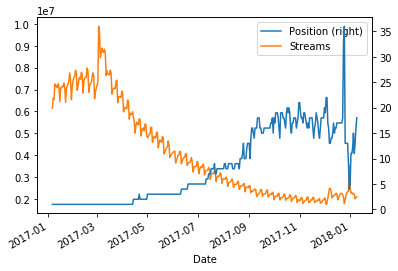

In [26]:
df_ed_global.plot('Date', ['Position', 'Streams'], kind = 'line', secondary_y ='Position')